In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Weather Station Locations.csv
/kaggle/input/weatherww2/Summary of Weather.csv


In [2]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
## 1 -step make the list of features which has missing values
missing=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in missing:
    print(feature, np.round(df[feature].isnull().mean(), 3)*100,  ' % missing values')

WindGustSpd 99.6  % missing values
Snowfall 1.0  % missing values
PoorWeather 71.2  % missing values
PRCP 1.6  % missing values
DR 99.6  % missing values
SPD 99.6  % missing values
MAX 0.4  % missing values
MIN 0.4  % missing values
MEA 0.4  % missing values
SNF 1.0  % missing values
SND 95.3  % missing values
FT 100.0  % missing values
FB 100.0  % missing values
FTI 100.0  % missing values
ITH 100.0  % missing values
PGT 99.6  % missing values
TSHDSBRSGF 71.2  % missing values
SD3 100.0  % missing values
RHX 100.0  % missing values
RHN 100.0  % missing values
RVG 100.0  % missing values
WTE 100.0  % missing values


In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
cols=[feature for feature in df.columns  if(df[feature].isnull().sum()/df.shape[0]*100<70)]
new_df=df[cols]
new_df=new_df.drop(['STA'],axis=1)
print('actual columns after dropping null values are  %s'%new_df.shape[1])

actual columns after dropping null values are  14


In [8]:
new_df.isnull().sum()

Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [9]:
new_df.dtypes

Date         object
Precip       object
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
PRCP         object
MAX         float64
MIN         float64
MEA         float64
SNF          object
dtype: object

In [10]:
new_df.Date.unique()

array(['1942-7-1', '1942-7-2', '1942-7-3', ..., '1941-8-22', '1941-8-23',
       '1941-8-24'], dtype=object)

In [11]:
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df['Date'].head(300)

0     1942-07-01
1     1942-07-02
2     1942-07-03
3     1942-07-04
4     1942-07-05
         ...    
295   1943-04-22
296   1943-04-23
297   1943-04-24
298   1943-04-25
299   1943-04-26
Name: Date, Length: 300, dtype: datetime64[ns]

In [12]:
new_df['Snowfall'].unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [13]:
new_df['SNF'].unique()

array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
       '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1',
       '2.3', '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2',
       '1.4', '3.1', '1.6', '3.4', '3.3', '2.7', 'T', 0.4, 0.3, 0.6, 0.1,
       0.2, 0.5], dtype=object)

In [14]:
new_df['Precip']=pd.to_numeric(new_df['Precip'],errors='coerce')
new_df['Snowfall']=pd.to_numeric(new_df['Snowfall'],errors='coerce')
new_df['PRCP']=pd.to_numeric(new_df['PRCP'],errors='coerce')
new_df['SNF']=pd.to_numeric(new_df['SNF'],errors='coerce')


In [15]:
new_df.head()

,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0.0
2,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0.0
3,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0.0
4,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0.0


**perfom scaling**

In [16]:
new_df.columns

Index(['Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR',
       'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [17]:
from sklearn.preprocessing import minmax_scale

new_df['Precip_scaled'] = minmax_scale(new_df['Precip'])
new_df['MaxTemp_scaled'] = minmax_scale(new_df['MaxTemp'])
new_df['MinTemp_scaled'] = minmax_scale(new_df['MinTemp'])
new_df['YR_scaled'] = minmax_scale(new_df['YR'])
new_df['MAX_scaled'] = minmax_scale(new_df['MAX'])
new_df['Snowfall_scaled'] = minmax_scale(new_df['Snowfall'])




In [18]:
new_df.columns

Index(['Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR',
       'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF', 'Precip_scaled',
       'MaxTemp_scaled', 'MinTemp_scaled', 'YR_scaled', 'MAX_scaled',
       'Snowfall_scaled'],
      dtype='object')

In [19]:
#plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns

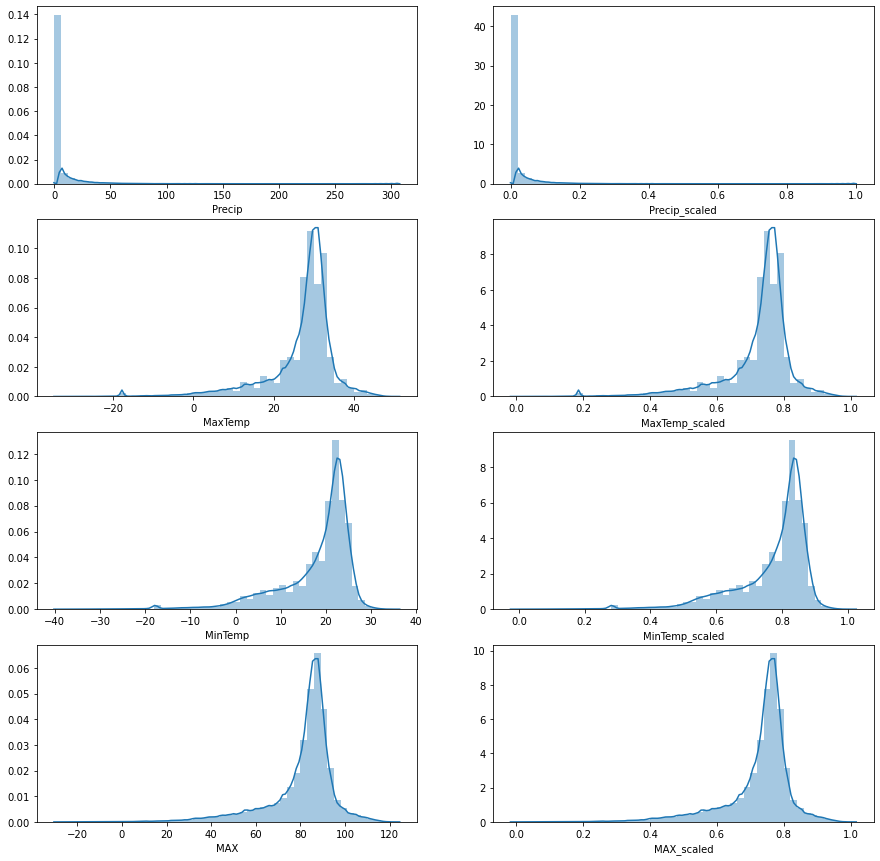

In [20]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
sns.distplot(new_df['Precip'],ax=ax[0][0])
sns.distplot(new_df['Precip_scaled'],ax=ax[0][1])

sns.distplot(new_df['MaxTemp'],ax=ax[1][0])
sns.distplot(new_df['MaxTemp_scaled'],ax=ax[1][1])

sns.distplot(new_df['MinTemp'],ax=ax[2][0])
sns.distplot(new_df['MinTemp_scaled'],ax=ax[2][1])


sns.distplot(new_df['MAX'],ax=ax[3][0])
sns.distplot(new_df['MAX_scaled'],ax=ax[3][1])





**Normalization**

In [21]:
from scipy.stats import boxcox

Precip_norm = boxcox(new_df['Precip_scaled'].loc[new_df['Precip_scaled'] > 0])
#MeanTemp_norm = boxcox(new_df['MeanTemp_scaled'].loc[new_df['MeanTemp_scaled'] > 0])

YR_norm = boxcox(new_df['YR_scaled'].loc[new_df['YR_scaled'] > 0])
Snowfall_norm = boxcox(new_df['Snowfall_scaled'].loc[new_df['Snowfall_scaled'] > 0])

MAX_norm = boxcox(new_df['MAX_scaled'].loc[new_df['MAX_scaled'] > 0])
#MIN_norm = boxcox(new_df['MIN_scaled'].loc[new_df['MIN_scaled'] > 0])

In [22]:
new_df.dtypes

Date               datetime64[ns]
Precip                    float64
MaxTemp                   float64
MinTemp                   float64
MeanTemp                  float64
Snowfall                  float64
YR                          int64
MO                          int64
DA                          int64
PRCP                      float64
MAX                       float64
MIN                       float64
MEA                       float64
SNF                       float64
Precip_scaled             float64
MaxTemp_scaled            float64
MinTemp_scaled            float64
YR_scaled                 float64
MAX_scaled                float64
Snowfall_scaled           float64
dtype: object

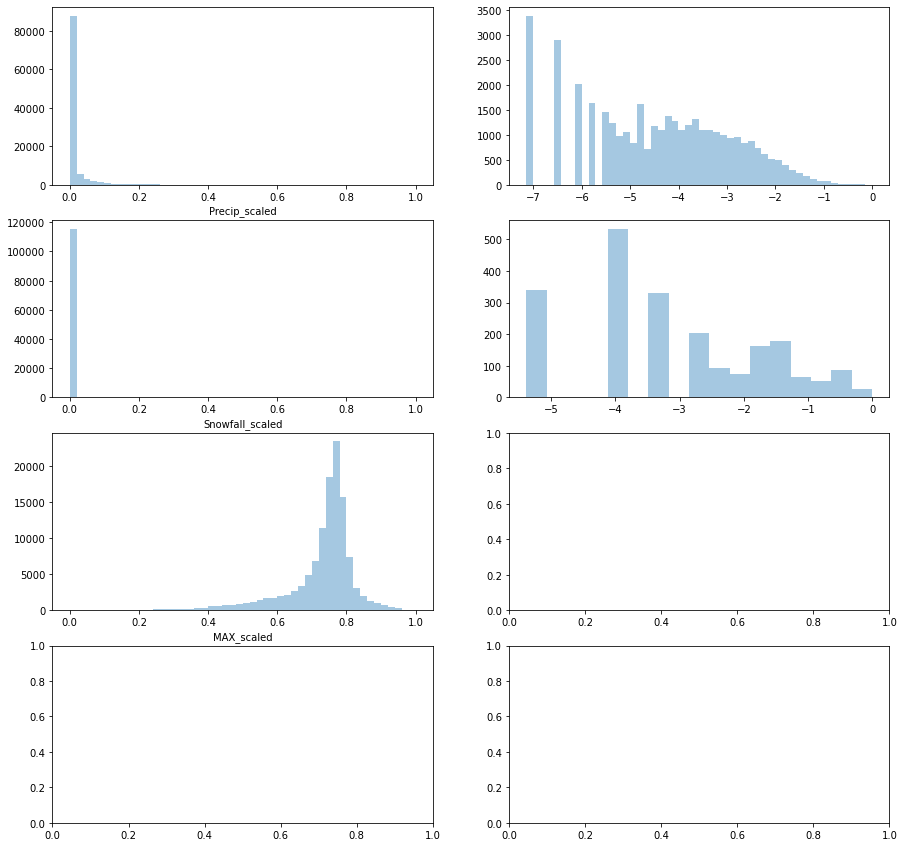

In [23]:
import statsmodels
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

sns.distplot(new_df['Precip_scaled'], ax=ax[0][0],kde=False)
sns.distplot(Precip_norm[0], ax=ax[0][1],kde=False)


sns.distplot(new_df['Snowfall_scaled'], ax=ax[1][0],kde=False)
sns.distplot(Snowfall_norm[0], ax=ax[1][1],kde=False)

sns.distplot(new_df['MAX_scaled'], ax=ax[2][0],kde=False)
#sns.distplot(MAX_norm[0], ax=ax[2][1],kde=False)

In [24]:
from scipy.stats import boxcox

Precip_norm = boxcox(new_df['Precip_scaled'].loc[new_df['Precip_scaled'] > 0])

YR_norm = boxcox(new_df['YR_scaled'].loc[new_df['YR_scaled'] > 0])
Snowfall_norm = boxcox(new_df['Snowfall_scaled'].loc[new_df['Snowfall_scaled'] > 0])
MAX_norm = boxcox(new_df['MAX_scaled'].loc[new_df['MAX_scaled'] > 0])


In [26]:
#hnadle NAN values
new_df.interpolate(method='linear',inplace=True)
new_df

,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Precip_scaled,MaxTemp_scaled,MinTemp_scaled,YR_scaled,MAX_scaled,Snowfall_scaled
0,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,0.003306,0.706667,0.832061,0.4,0.706667,0.0
1,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0.0,0.000000,0.746667,0.824427,0.4,0.746667,0.0
2,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0.0,0.008264,0.713333,0.832061,0.4,0.713333,0.0
3,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0.0,0.008264,0.720000,0.832061,0.4,0.720000,0.0
4,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0.0,0.000000,0.720000,0.824427,0.4,0.720000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,1945-12-27,0.000,28.333333,18.333333,23.333333,0.0,45,12,27,0.00,83.0,65.0,74.0,0.0,0.000000,0.740000,0.778626,1.0,0.740000,0.0
119036,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,0.39,85.0,65.0,75.0,0.0,0.032231,0.753333,0.778626,1.0,0.753333,0.0
119037,1945-12-29,0.000,28.333333,18.333333,23.333333,0.0,45,12,29,0.00,83.0,65.0,74.0,0.0,0.000000,0.740000,0.778626,1.0,0.740000,0.0
119038,1945-12-30,0.000,28.333333,18.333333,23.333333,0.0,45,12,30,0.00,83.0,65.0,74.0,0.0,0.000000,0.740000,0.778626,1.0,0.740000,0.0


In [27]:
new_df.isnull().sum()

Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           0
YR                 0
MO                 0
DA                 0
PRCP               0
MAX                0
MIN                0
MEA                0
SNF                0
Precip_scaled      0
MaxTemp_scaled     0
MinTemp_scaled     0
YR_scaled          0
MAX_scaled         0
Snowfall_scaled    0
dtype: int64

In [28]:
new_df.head()

,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Precip_scaled,MaxTemp_scaled,MinTemp_scaled,YR_scaled,MAX_scaled,Snowfall_scaled
0,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,0.003306,0.706667,0.832061,0.4,0.706667,0.0
1,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0.0,0.000000,0.746667,0.824427,0.4,0.746667,0.0
2,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0.0,0.008264,0.713333,0.832061,0.4,0.713333,0.0
3,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0.0,0.008264,0.720000,0.832061,0.4,0.720000,0.0
4,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0.0,0.000000,0.720000,0.824427,0.4,0.720000,0.0


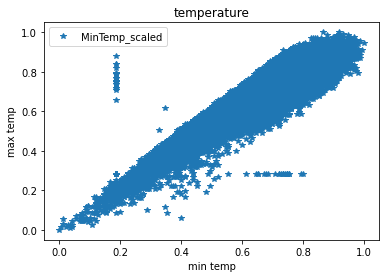

In [29]:
new_df.plot(x='MaxTemp_scaled',y='MinTemp_scaled',style='*')
plt.title('temperature')
plt.xlabel('min temp')
plt.ylabel('max temp')
plt.show()

In [48]:
#because sklearn expects a 2D array as input
X = new_df['MinTemp_scaled'].values.reshape(-1,1)
y = new_df['MaxTemp_scaled'].values.reshape(-1,1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [51]:
X_train.shape

(95232, 1)

In [52]:
y_train.shape

(95232, 1)

In [56]:
from sklearn.linear_model import LinearRegression

In [59]:
reg=LinearRegression()
reg

LinearRegression()

In [60]:
reg.fit(X_train,y_train)

LinearRegression()

In [61]:
#To retrieve the intercept:
print(reg.intercept_)

#For retrieving the slope:
print(reg.coef_) 


[0.10458584]
[[0.80376357]]


In [62]:
y_pred=reg.predict(X_test)
y_pred

array([[0.80404421],
       [0.76109502],
       [0.71814582],
       ...,
       [0.79177301],
       [0.76723062],
       [0.77950181]])

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.038391950142078024
Mean Squared Error: 0.0025389458062529723
Root Mean Squared Error: 0.05038795298732597


*from above we can see that root mean squared error is 0.05 which is less than 10% 
so our algo can work fine!! if any query you can suggest*